# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Achmad Dzaky Ramadhani
- **Email:** achmad.dzaky48@gmail.com
- **ID Dicoding:** dzaky1305

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda pada setiap musim?

- Bagaimana tren jumlah total penyewaan sepeda dari bulan ke bulan selama periode 2011 dan 2012 ?

- Bagaimana perbedaan pola penyewaan sepeda antara setiap cuaca ?

- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan ?

## Import Semua Packages/Library yang Digunakan

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from datetime import datetime

## Data Wrangling

Pada tahap ini saya akan mengumpulkan data yang ada. Saya memilih Bike Sharing Dataset dan saya hanya akan mengimpor file day.csv dari link github yang ada.

Berikut ini adalah penjelasan untuk setiap kolomnya

| **Column Name** | **Description**                                                                                       |
|-----------------|-------------------------------------------------------------------------------------------------------|
| dteday          | Date of the record                                                                                    |
| season          | Season (1: spring, 2: summer, 3: fall, 4: winter)                                                    |
| yr              | Year (0: 2011, 1: 2012)                                                                               |
| mnth            | Month (1 to 12)                                                                                       |
| hr              | Hour (0 to 23)                                                                                        |
| holiday         | Indicates whether it's a holiday or not
| weekday         | Day of the week                                                                                       |
| workingday      | 1 if the day is neither a weekend nor a holiday, otherwise 0                                         |
| weathersit      | Weather situation: <br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp            | Normalized temperature in Celsius (values divided by 41, max value)                                   |
| atemp           | Normalized feeling temperature in Celsius (values divided by 50, max value)                            |
| hum             | Normalized humidity (values divided by 100, max value)                                                |
| windspeed       | Normalized wind speed (values divided by 67, max value)                                                |
| casual          | Count of casual users                                                                                 |
| registered      | Count of registered users                                                                             |
| cnt             | Count of total rental bikes (including both casual and registered users)                               |

### Gathering Data

In [27]:
url = 'https://raw.githubusercontent.com/feverlash/Analisis-Data/d3ebcff8ad430d6c486b4c30ed771084dfaa383d/Bike-sharing-dataset/day.csv'

# Membaca data dari URL
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
print("Data Harian:")
data.head()

Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Assesing data merupakan proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

**- Mengecek tipe data file day.csv**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Saya akan memperbaiki dteday menjadi datetime

**- Mendeteksi Missing Values dan Duplicate Data**

In [29]:
#Mendeteksi Missing Values
print("\nMissing Value:")
data.isnull().sum()


Missing Value:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat tabel data tidak ada missing values.

**- Mendeteksi Duplicate Data**

In [30]:
#Mendeteksi Duplicate Data
print("\nDuplicate Data:")
data.duplicated().sum()


Duplicate Data:


0

Dapat tabel data tidak ada duplicate data.

**- Mencari outlier untuk variabel temp, atemp, hum, windspeed, casual, registered, dan cnt.**

In [31]:
# Memilih kolom yang ingin dianalisis untuk outlier
columns_to_analyze = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Mencari outlier untuk setiap kolom
outliers = {}
for column in columns_to_analyze:
    q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off

    # Mengidentifikasi outlier
    outlier_indices = np.where((data[column] < lower_bound) | (data[column] > upper_bound))
    outliers[column] = outlier_indices[0]

# Menampilkan outlier untuk setiap kolom
for column, outlier_index in outliers.items():
    print("Outlier pada kolom", column, ":", outlier_index)

Outlier pada kolom temp : []
Outlier pada kolom atemp : []
Outlier pada kolom hum : [49 68]
Outlier pada kolom windspeed : [ 44  49  93  94 292 382 407 420 432 433 450 666 721]
Outlier pada kolom casual : [148 183 184 196 246 281 441 447 455 456 462 469 470 476 490 497 504 505
 511 512 513 518 519 525 532 533 539 540 550 560 568 581 595 609 610 617
 623 630 631 637 644 658 665 680]
Outlier pada kolom registered : []
Outlier pada kolom cnt : []


**- Hasil assessing data.**

Dari hasil assessing data, diperoleh bahwa:

- Tidak ada missing values pada dataset.
- Tidak ada duplicate pada dataset.
- Terdapat outliers pada dataset.

### Cleaning Data

In [32]:
# Melakukan dropping pada setiap outlier
# Menggabungkan semua indeks outlier menjadi satu set
all_outliers = set()
for column, outlier_index in outliers.items():
    all_outliers.update(outlier_index)

# Menjatuhkan baris yang mengandung outlier
data.drop(index=list(all_outliers))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [33]:
# Mengubah beberapa nama dari kolom yang ada agar lebih enak dibaca dan mengubah beberapa tipe data agar lebih mudah dipahami.
data.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'total_rental'
}, inplace=True)

data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total_rental
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
# Mengubah angka menjadi keterangan
data['month'] = data['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
data['season'] = data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
data['weekday'] = data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
data['weather_cond'] = data['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [35]:
# Mengubah tipe data ke datetime
data['dateday'] = pd.to_datetime(data.dateday)

In [36]:
data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total_rental
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    object        
 3   year          731 non-null    int64         
 4   month         731 non-null    object        
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    object        
 7   workingday    731 non-null    int64         
 8   weather_cond  731 non-null    object        
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  total_rental  731 non-null    int64     

In [38]:
directory = '/content/Bike Sharing Dataset'
if not os.path.exists(directory):
    os.makedirs(directory)

# save file untuk diupload ke github
data.to_csv('/content/Bike Sharing Dataset/cleaned_day.csv', index=False)

data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total_rental
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

Pada tahap ini kita akan mengeksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

### Eksplorasi Dataset Harian

In [39]:
# Menampilkan beberapa baris pertama dari DataFrame yang sudah dibersihkan
print("\nParameter statistik dari dataset harian")
data.describe(include="all")


Parameter statistik dari dataset harian


<ipython-input-39-157d7a76db7d>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total_rental
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,Jan,NaN,Sat,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [40]:
# Menghitung jumlah penyewaan sepeda berdasarkan musim.
season_counts=data.groupby('season')['total_rental'].sum().reset_index()
data.groupby('season')['total_rental'].sum().reset_index()

,season,total_rental
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


In [41]:
# Mengelompokkan data berdasarkan bulan dan tahun untuk mencari tren jumlah total penyewaan sepeda dari bulan ke bulan selama periode 2011 dan 2012.
data['month'] = pd.Categorical(data['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = data.groupby(by=["month","year"]).agg({
    "total_rental": "sum"
}).reset_index()

monthly_counts.head()

,month,year,total_rental
0,Jan,0,38189
1,Jan,1,96744
2,Feb,0,48215
3,Feb,1,103137
4,Mar,0,64045


In [42]:
# Menghitung jumlah penyewaan sepeda berdasarkan kondisi cuaca
bike_rentals_per_weather = data.groupby('weather_cond')['total_rental'].sum().reset_index()
bike_rentals_per_weather.columns = ['Weather Situation', 'Total Rentals']

# Menampilkan jumlah penyewaan sepeda berdasarkan kondisi cuaca
data.groupby('weather_cond')['total_rental'].sum().reset_index()

,weather_cond,total_rental
0,Clear/Partly Cloudy,2257952
1,Light Snow/Rain,37869
2,Misty/Cloudy,996858


In [43]:
# Menghitung jumlah penyewaan sepeda berdasarkan hari kerja
workingday_counts = data.groupby('workingday')['total_rental'].sum().reset_index()
workingday_counts.columns = ['Working Day', 'Counts']

data.groupby('workingday')['total_rental'].sum().reset_index()

,workingday,total_rental
0,0,1000269
1,1,2292410


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penyewaan sepeda pada setiap musim?

<ipython-input-44-65489cefe20a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rental', data=season_counts, palette='bright')


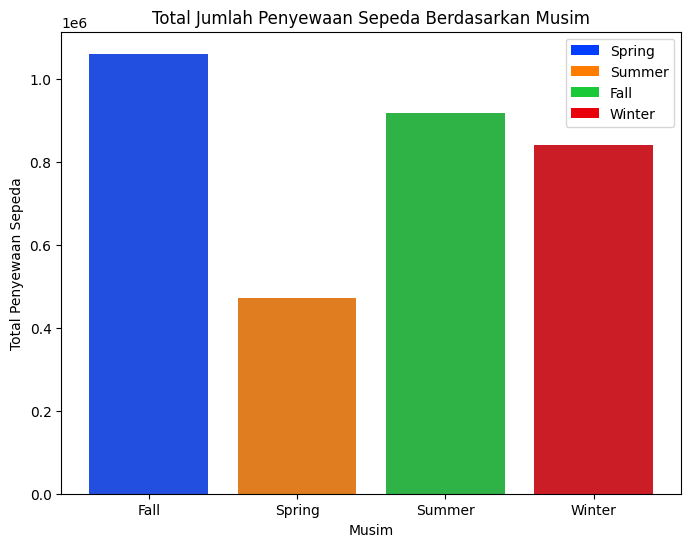

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='total_rental', data=season_counts, palette='bright')
legend_labels = ['Spring', 'Summer', 'Fall', 'Winter']
for i, label in enumerate(legend_labels):
    plt.bar(0, 0, color=sns.color_palette('bright')[i], label=label)
plt.title('Total Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana tren jumlah total penyewaan sepeda dari bulan ke bulan selama periode 2011 dan 2012 ?

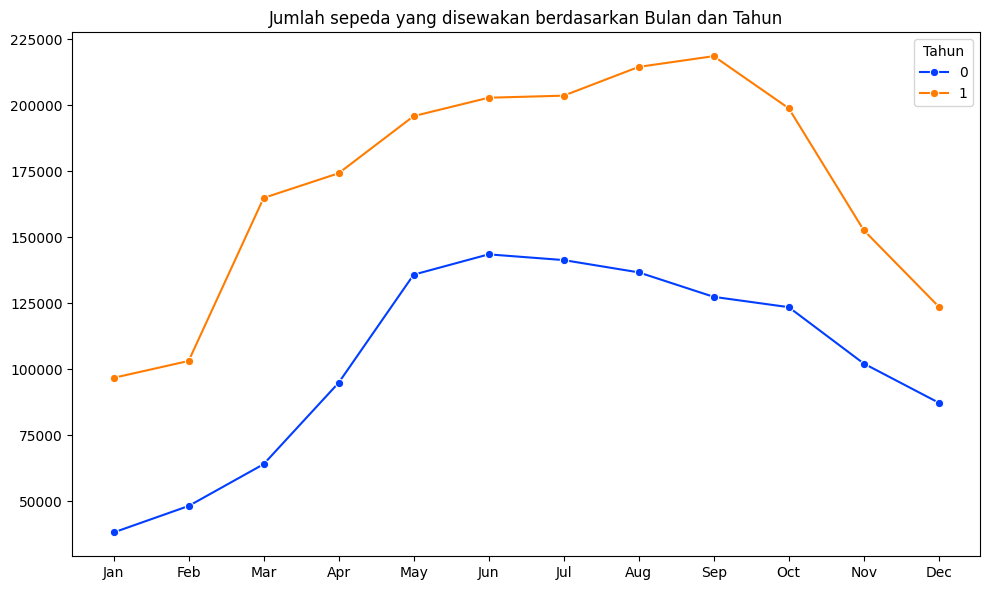

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="total_rental",
    hue="year",
    palette="bright",
    marker="o")

plt.title("Jumlah sepeda yang disewakan berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana perbedaan pola penyewaan sepeda antara setiap cuaca?

<ipython-input-46-f7b4e71e9890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather Situation', y='Total Rentals', data=bike_rentals_per_weather, palette='bright')


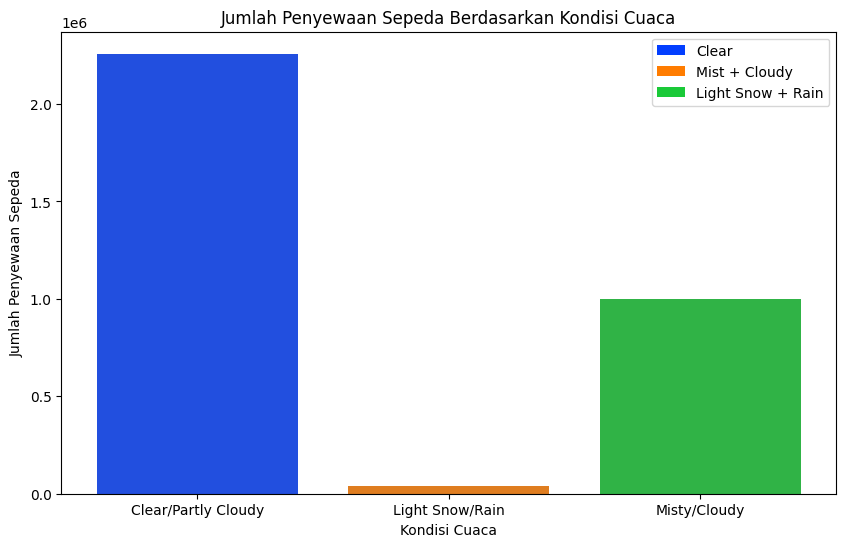

In [46]:
# Memvisualisasikan jumlah penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Situation', y='Total Rentals', data=bike_rentals_per_weather, palette='bright')
legend_labels = ['Clear', 'Mist + Cloudy', 'Light Snow + Rain']
for i, label in enumerate(legend_labels):
    plt.bar(0, 0, color=sns.color_palette('bright')[i], label=label)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.show()

###Pertanyaan 4: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

<ipython-input-47-dde856d57478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Working Day', y='Counts', data=workingday_counts, palette='bright')


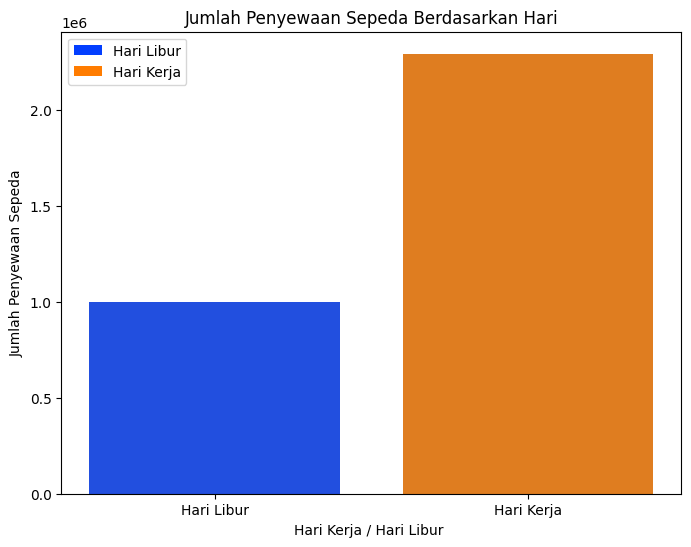

In [47]:
# Memvisualisasikan jumlah penyewaan sepeda berdasarkan workingday
plt.figure(figsize=(8, 6))
sns.barplot(x='Working Day', y='Counts', data=workingday_counts, palette='bright')
legend_labels = ['Hari Libur', 'Hari Kerja']
for i, label in enumerate(legend_labels):
    plt.bar(0, 0, color=sns.color_palette('bright')[i], label=label)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari Kerja / Hari Libur ')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Libur', 'Hari Kerja'])
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1

Musim fall atau musim gugur memiliki paling banyak penyewa sepeda harian, ini disebabkan oleh cuaca yang lebih stabil dan kondusif untuk bersepeda di musim ini. Hal yang mengejutkan adalah ternyata musim dengan jumlah penyewa sepeda paling sedikit adalah musim spring atau musim semi dan bukan musim winter atau salju, Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain.

- Conclution pertanyaan 2

Dapat dilihat pada grafik bahwa tahun 2012 lebih unggul daripada tahun 2011, hal ini berarti penyewaan sepeda mengalami kenaikan dari tahun 2011, puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan september, sedangkan jumlah penyewaan sepeda yang paling sedikit terjadi pada bulan januari.

- Conclution pertanyaan 3

Jumlah penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dibandingkan dengan cuaca berawan atau cuaca hujan/salju.
Orang cenderung lebih memilih untuk menyewa sepeda saat cuaca cerah karena kondisi cuaca yang baik membuat mereka lebih nyaman untuk bersepeda.
Pengelola layanan penyewaan sepeda dapat mempertimbangkan untuk meningkatkan promosi atau layanan spesifik saat cuaca cerah untuk meningkatkan penggunaan sepeda.

- Conclution pertanyaan 4

Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja daripada pada hari libur.
Hal ini mungkin disebabkan oleh kebiasaan sehari-hari masyarakat yang lebih sering menggunakan sepeda pada saat bekerja atau melakukan aktivitas sehari-hari daripada pada saat libur.
Informasi ini dapat membantu dalam perencanaan layanan atau promosi yang lebih tepat sasaran berdasarkan pola penggunaan sepeda pada hari kerja dan hari libur.

## Menerapkan teknik analisis lanjutan, yaitu time series analysis

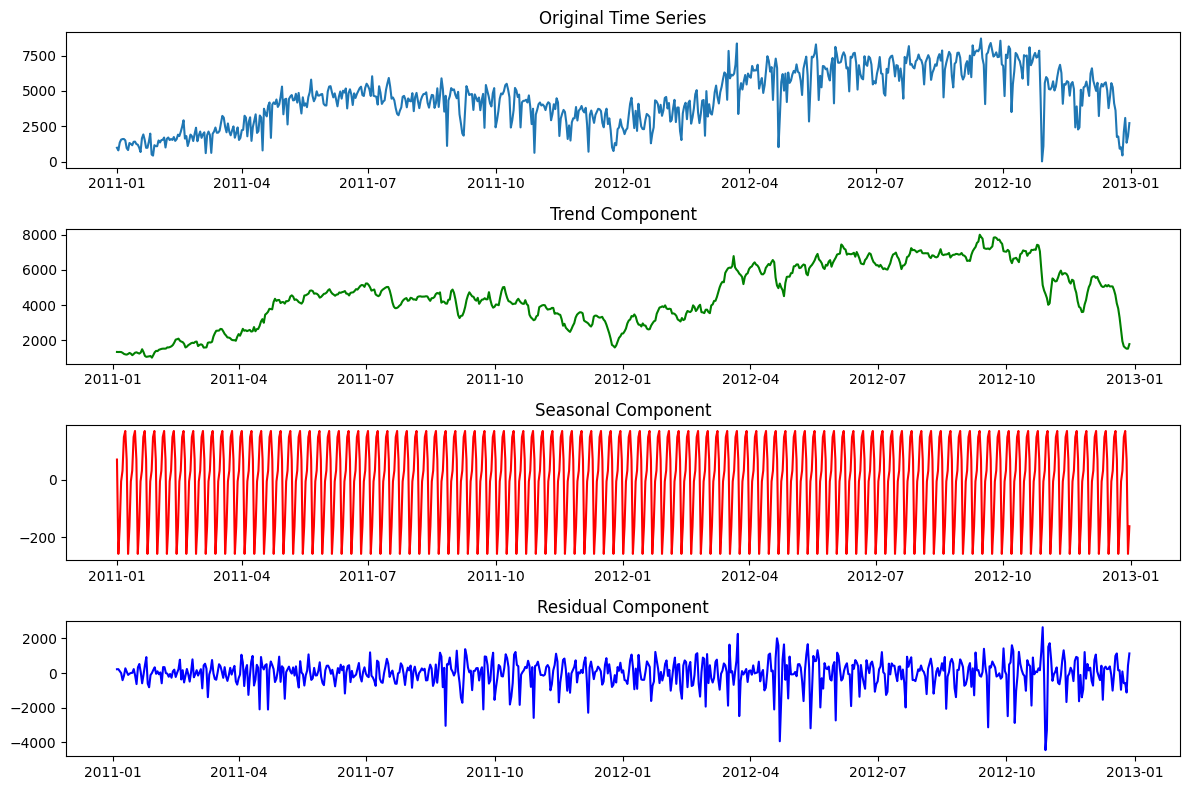

In [48]:
data.set_index('dateday', inplace=True)

y = data['total_rental']

# Decompose
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

# Plot
# Plot original data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.title('Original Time Series')

# Plot trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')

# Plot seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal Component')

# Plot residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='blue')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut penyewaan sepeda harian mengalami selalu mengalami tren naik sesudah bulan ke-1 dan akan mengalami tren turun saat mendekati bulan k-2. dapat dilihat bahwa penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011 yang di mana Puncak tertinggi berada di sekitar 2012-10 pada periode 2011-01 sampai dengan 2013-01.

Dapat dilihat juga bahwa terdapat pola musiman yang terjadi berulang-ulang secara konsisten selama periode 2011-01 sampai dengan 2013-01.

In [49]:
pip freeze > requirements.txt